<a href="https://colab.research.google.com/github/preetbhagat7/LovePreet-Portfolio/blob/main/classification_searches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install transformers torch

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline
import re
from collections import Counter
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Searches.xlsx to Searches.xlsx


In [11]:
df = pd.read_excel("Searches.xlsx")

# Clean query column
df['query'] = df['query'].astype(str).str.strip()

In [12]:
# Define category list
categories = [
    "Fashion",
    "Home & Kitchen",
    "Health & Wellness",
    "Baby & Toys",
    "Electronics",
    "Tools",
    "Sports",
    "Beauty & Personal Care",
]

In [13]:
# Zero-shot classifier
classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    device=0  # GPU if available
)

Device set to use cuda:0


In [14]:
# Convert column to list
queries = df['query'].tolist()

In [15]:
# Batch classification
results = classifier(
    sequences=queries,
    candidate_labels=categories,
    hypothesis_template="This item is related to {}."
)

In [16]:
# Append results
df['predicted_category'] = [r['labels'][0] for r in results]
df['pred_score'] = [round(r['scores'][0], 3) for r in results]

In [17]:
# Count categories
category_counts = df['predicted_category'].value_counts()

print("Category Count Summary:")
print(category_counts)


Category Count Summary:
predicted_category
Health & Wellness         306
Sports                    271
Home & Kitchen            204
Tools                     159
Electronics               157
Baby & Toys                48
Fashion                    46
Beauty & Personal Care     17
Name: count, dtype: int64


In [46]:
# Convert category counts to dict for lookup
category_totals = category_counts.to_dict()

# PIE CHART
def show_pie_chart():
    plt.figure(figsize=(5, 5))
    plt.pie(category_totals.values(), labels=category_totals.keys(), autopct='%1.1f%%')
    plt.title("Search Distribution by Category")
    plt.show()

# LOOKUP FUNCTION
def lookup_keyword():
    user_kw = input("\nEnter keyword to search: ").strip().lower()
    pattern = rf"{re.escape(user_kw)}"   # partial match allowed

    # mask to filter searches
    mask = df['query'].str.contains(pattern, case=False, na=False)

    if mask.sum() == 0:
        print("\n This keyword has NEVER been searched before!\n")
        show_pie_chart()
        return

    matched_queries = df.loc[mask, 'query'].str.lower().tolist()
    query_counter = Counter(matched_queries)

    print("\n============================")
    print(f"🔍 Keyword: {user_kw}")
    print("============================")
    print(f"Total Searches Matching This Keyword: {sum(query_counter.values())}\n")

    print("Matched Queries:")
    for q, c in query_counter.items():
        print(f"  {q} → {c}")

    # Detect predicted category
    found_cat = df.loc[df['query'].str.lower() == user_kw, 'predicted_category']
    found_cat = found_cat.values[0] if len(found_cat) > 0 else None

    if found_cat:
        cat_count = category_totals.get(found_cat, 0)

        # searches in this category for this keyword
        matched_in_category = df[(df['predicted_category'] == found_cat) &
                                 (df['query'].str.contains(pattern, case=False, na=False))].shape[0]

        print(f"\nPredicted Category: {found_cat}")
        print(f" Total Searches in this Category: {cat_count}")
        # print(f" Searches with this Keyword in this Category: {matched_in_category}")
    else:
        print("\n No category detected for this keyword.")

    print("\n CATEGORY SEARCH DISTRIBUTION")
    show_pie_chart()




## To Download Excel_file Uncomment Below:-

In [39]:
# # Save classified results to Excel
# output_file = "classified_search_results.xlsx"
# df.to_excel(output_file, index=False)

# print(f"File saved successfully: {output_file}")

# from google.colab import files
# files.download(output_file)


File saved successfully: classified_search_results.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Enter keyword to search: massager

🔍 Keyword: massager
Total Searches Matching This Keyword: 128

Matched Queries:
  massager foot → 10
  massager → 78
  head massager → 1
  massager calf leg → 2
  body massager → 1
  lifelong massager under 10000 → 1
  massager body → 2
  face massager → 1
  massager gun → 6
  tredmil with massager → 1
  warranty massager → 1
  massager thigh → 1
  massager pain relief → 2
  massager calf → 1
  lifelong massager under 5000 → 1
  leg & calf massager → 1
  massager foot calf → 1
  foot massager wire → 1
  lifelong massager foot → 1
  massager vibrator → 1
  massager air pressure → 1
  air massager → 1
  massager electric → 1
  massager leg → 1
  massager under 15000 → 1
  gun massager → 1
  electric foot massager → 1
  massager handheld → 1
  eye massager → 2
  arm massager → 1
  massager leg calf → 1
  cushion massager → 1
  lifelong massager gun → 1

Predicted Category: Health & Wellness
 Total Searches in this Category: 306

 CATEGORY SEARCH DISTRIB

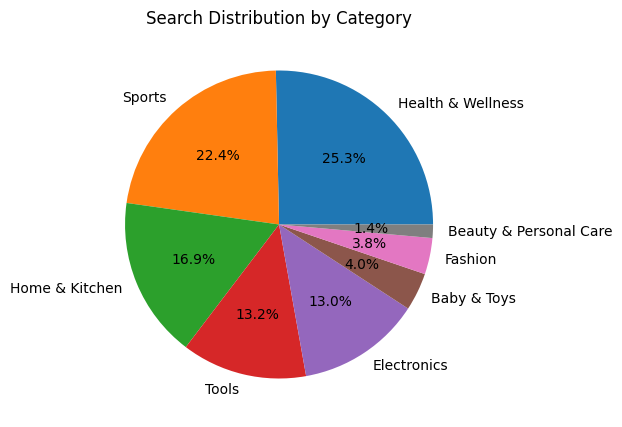

In [51]:
# RUN THE LOOKUP ANYTIME
lookup_keyword()
